In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [6]:
# Dummy Model
dummy_model_prob = [0 for _ in range(len(y_test))]

In [7]:
model_prob = model.predict_proba(X_test_scaled)

In [8]:
model_prob = model_prob[:, 1]  # Focus only on +ve

In [9]:
from sklearn.metrics import roc_auc_score

dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(f"Dummy Model roc_auc_score: {dummy_model_auc}")
print(f"Actual Model roc_auc_score: {model_auc}")

Dummy Model roc_auc_score: 0.5
Actual Model roc_auc_score: 0.9231811145510836


In [10]:
from sklearn.metrics import roc_curve

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

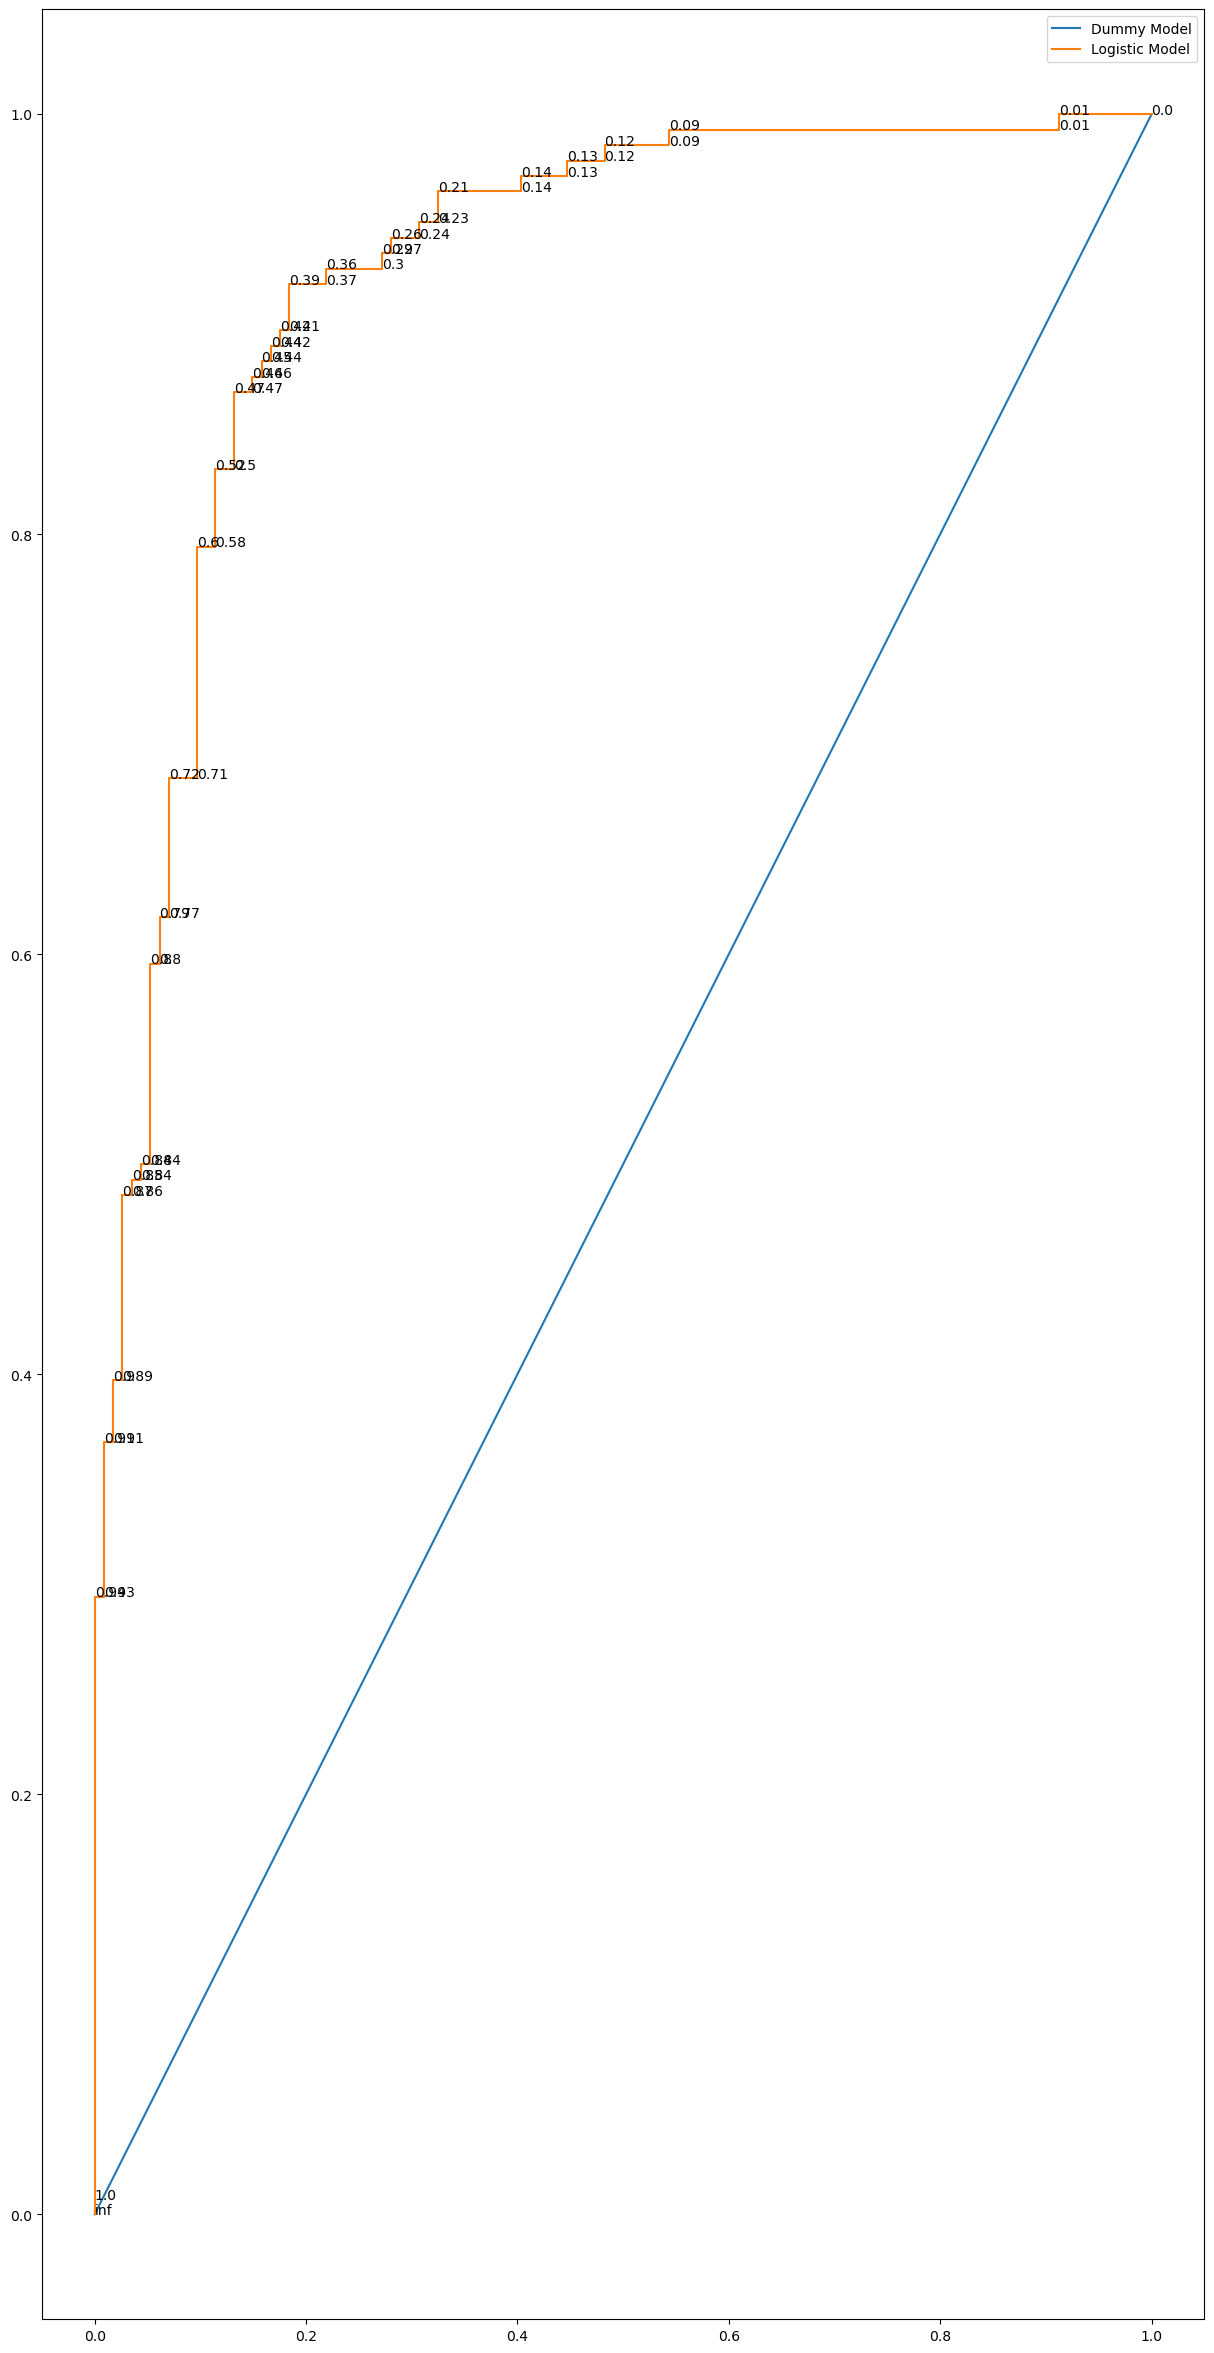

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 30))
plt.plot(dummy_fpr, dummy_tpr, label="Dummy Model")
plt.plot(model_fpr, model_tpr, label="Logistic Model")
plt.legend()

for xyz in zip(model_fpr, model_tpr, thresholds):
    plt.annotate("%s" % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))